# PCA(Principal Component Analysis) 
technique use to reduce dimensionality

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_breast_cancer
breast_cancer  = load_breast_cancer()
# breast_cancer
breast_cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
print(breast_cancer["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [32]:
x=breast_cancer["data"]
y= breast_cancer["target"]

In [33]:
from sklearn.decomposition import PCA
p = PCA(n_components=2)
pca = p.fit_transform(x)

In [34]:
x.shape

(569, 30)

In [35]:
pca.shape

(569, 2)

# Decision Tree
A tree-like algorithm that splits data based on feature values to make predictions.

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(pca, y, test_size=0.2, random_state=42)
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [37]:
y_pred = clf.predict(x_test)

# Confusion Matrix
A table comparing predicted vs actual outcomes to evaluate classification performance.

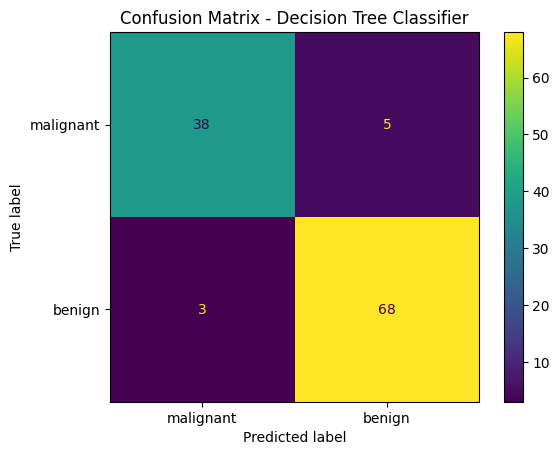

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=breast_cancer['target_names'])
disp.plot()
plt.title("Confusion Matrix - Decision Tree Classifier")
plt.show()